## Observations and Insights 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
print(mouse_metadata)
study_results = pd.read_csv(study_results_path)
print(study_results)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

In [38]:
# Combine the data into a single dataset
merge_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")
merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [39]:
merge_data["Mouse ID"].nunique()

249

In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_data['Mouse ID'].value_counts().head()

g989    13
k210    10
s565    10
j989    10
x773    10
Name: Mouse ID, dtype: int64

In [41]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_data_mice = merge_data.set_index('Mouse ID')
mouse = merge_data_mice.loc['g989', :]
mouse.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_mice = merge_data_mice.drop(index = 'g989')
clean_merge_data = clean_data_mice.reset_index()
clean_merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [43]:
# Checking the number of mice in the clean DataFrame.
clean_merge_data["Mouse ID"].nunique()

248

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean_df = pd.DataFrame(clean_merge_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())
tumor_mean_df= tumor_mean_df.rename(columns={"Tumor Volume (mm3)":"Tumer Mean"})
tumor_mean_df = tumor_mean_df.reset_index()

tumor_median_df = pd.DataFrame(clean_merge_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median())
tumor_median_df= tumor_median_df.rename(columns={"Tumor Volume (mm3)":"Tumer Median"})
tumor_median_df = tumor_median_df.reset_index()

tumor_var_df = pd.DataFrame(clean_merge_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var())
tumor_var_df = tumor_var_df.rename(columns={"Tumor Volume (mm3)":"Tumer Variance"})
tumor_var_df = tumor_var_df.reset_index()

tumor_std_df = pd.DataFrame(clean_merge_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std())
tumor_std_df = tumor_std_df.rename(columns={"Tumor Volume (mm3)":"Tumer Standard Dev"})
tumor_std_df = tumor_std_df.reset_index()

tumor_SEM_df = pd.DataFrame(clean_merge_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem())
tumor_SEM_df = tumor_SEM_df.rename(columns={"Tumor Volume (mm3)":"Tumer Standard Err"})
tumor_SEM_df = tumor_SEM_df.reset_index()

# Preview DataFrame
print("====================MEAN=====================")
print(tumor_mean_df.head(10))
print("====================MEDIAN===================")
print(tumor_median_df.head(10))
print("====================VARIANCE=================")
print(tumor_var_df.head(10))
print("==================STANDARD DEV================")
print(tumor_std_df.head(10))
print("==================STANDARD ERR================")
print(tumor_SEM_df.head(10))

# This method is the most straighforward, creating multiple series and putting them all together at the end.

====================MEAN=====================
  Drug Regimen  Tumer Mean
0    Capomulin   40.675741
1     Ceftamin   52.591172
2    Infubinol   52.884795
3     Ketapril   55.235638
4     Naftisol   54.331565
5      Placebo   54.033581
6     Propriva   52.320930
7     Ramicane   40.216745
8     Stelasyn   54.233149
9    Zoniferol   53.236507
====================MEDIAN===================
  Drug Regimen  Tumer Median
0    Capomulin     41.557809
1     Ceftamin     51.776157
2    Infubinol     51.820584
3     Ketapril     53.698743
4     Naftisol     52.509285
5      Placebo     52.288934
6     Propriva     50.446266
7     Ramicane     40.673236
8     Stelasyn     52.431737
9    Zoniferol     51.818479
====================VARIANCE=================
  Drug Regimen  Tumer Variance
0    Capomulin       24.947764
1     Ceftamin       39.290177
2    Infubinol       43.128684
3     Ketapril       68.553577
4     Naftisol       66.173479
5      Placebo       61.168083
6     Propriva       43.85201

In [45]:
new_merge_data1 = pd.merge(tumor_mean_df, tumor_median_df, on="Drug Regimen")
new_merge_data2 = pd.merge(new_merge_data1, tumor_var_df, on="Drug Regimen")
new_merge_data3 = pd.merge(new_merge_data2, tumor_std_df, on="Drug Regimen")
new_merge_data4 = pd.merge(new_merge_data3, tumor_SEM_df, on="Drug Regimen")
new_merge_data4.head(10)

,Drug Regimen,Tumer Mean,Tumer Median,Tumer Variance,Tumer Standard Dev,Tumer Standard Err
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar Plots

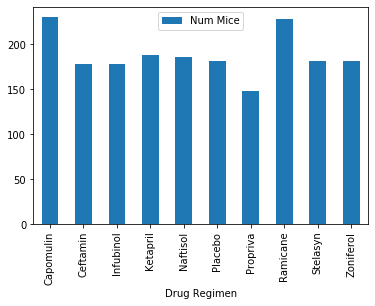

In [46]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas
mice_cnt_df = pd.DataFrame(clean_merge_data.groupby(['Drug Regimen'])['Timepoint'].count())
mice_cnt_df = mice_cnt_df.rename(columns={"Timepoint":"Num Mice"})
#mice_cnt_df.head(10)
mice_cnt_df.plot(kind="bar")

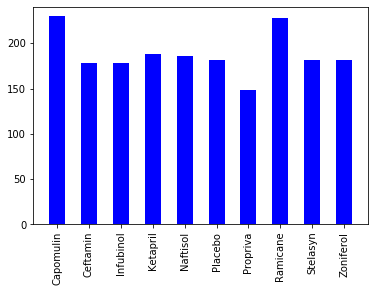

In [50]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#set x axis and ticks
x_axis = np.arange(len(mice_cnt_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6,4))
plt.bar(x_axis, mice_cnt_df["Num Mice"], color = "b", width = .5)
plt.xticks(tick_locations, mice_cnt_df.index.values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(mice_cnt_df["Num Mice"])+10)

plt.show()


## Pie Plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0F5EC4710>],
      dtype=object)

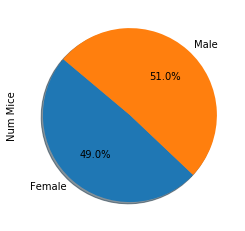

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_df = pd.DataFrame(clean_merge_data.groupby(['Sex'])['Timepoint'].count())
mice_gender_df = mice_gender_df.rename(columns={"Timepoint":"Num Mice"})

mice_gender_df.plot(kind="pie", labels=mice_gender_df.index.values,
        autopct="%1.1f%%", shadow=True, startangle=140, subplots=True,legend=False)

(-1.1171944866462706,
 1.1057967798535038,
 -1.110919364943666,
 1.107907705791865)

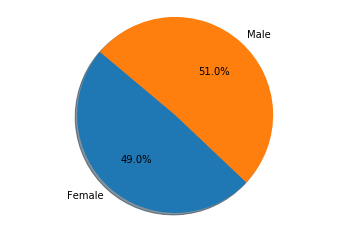

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender_df["Num Mice"], labels=mice_gender_df.index.values,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')


## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumer_vol = clean_merge_data[["Tumor Volume (mm3)", "Mouse ID", "Drug Regimen", "Timepoint"]]

list_mouse_ids = list(clean_merge_data["Mouse ID"].unique())


for mouse in list_mouse_ids:

    print(tumer_vol[tumer_vol["Mouse ID"] == mouse][["Mouse ID","Tumor Volume (mm3)","Drug Regimen"]].tail(1))
    #tumer_vol[tumer_vol["Mouse ID"] == "b128"].tail(1)




  Mouse ID  Tumor Volume (mm3) Drug Regimen
9     b128           38.982878    Capomulin
   Mouse ID  Tumor Volume (mm3) Drug Regimen
10     f932                45.0     Ketapril
   Mouse ID  Tumor Volume (mm3) Drug Regimen
18     g107           71.905117     Ketapril
   Mouse ID  Tumor Volume (mm3) Drug Regimen
21     a457           49.783419     Ketapril
   Mouse ID  Tumor Volume (mm3) Drug Regimen
30     c819           62.175705     Ketapril
   Mouse ID  Tumor Volume (mm3) Drug Regimen
40     h246           74.104086     Ketapril
   Mouse ID  Tumor Volume (mm3) Drug Regimen
50     p189           75.294936     Ketapril
   Mouse ID  Tumor Volume (mm3) Drug Regimen
59     n923           66.229606     Ketapril
   Mouse ID  Tumor Volume (mm3) Drug Regimen
62     q119           51.236606     Ketapril
   Mouse ID  Tumor Volume (mm3) Drug Regimen
67     f993            52.07951     Naftisol
   Mouse ID  Tumor Volume (mm3) Drug Regimen
69     z234           46.129357     Naftisol
   Mouse ID 

     Mouse ID  Tumor Volume (mm3) Drug Regimen
1101     j235           52.942902      Placebo
     Mouse ID  Tumor Volume (mm3) Drug Regimen
1111     q787           66.096475      Placebo
     Mouse ID  Tumor Volume (mm3) Drug Regimen
1121     a262           70.717621      Placebo
     Mouse ID  Tumor Volume (mm3) Drug Regimen
1125     r850           50.218605      Placebo
     Mouse ID  Tumor Volume (mm3) Drug Regimen
1131     i669           53.303185      Placebo
     Mouse ID  Tumor Volume (mm3) Drug Regimen
1140     n763           58.011146      Placebo
     Mouse ID  Tumor Volume (mm3) Drug Regimen
1146     s152           64.119142      Placebo
     Mouse ID  Tumor Volume (mm3) Drug Regimen
1156     c766           69.823146      Placebo
     Mouse ID  Tumor Volume (mm3) Drug Regimen
1166     e227           73.212939      Placebo
     Mouse ID  Tumor Volume (mm3) Drug Regimen
1176     c282           65.815165      Placebo
     Mouse ID  Tumor Volume (mm3) Drug Regimen
1179     v989

['Ramicane', 'Capomulin', 'Propriva', 'Ceftamin']

In [91]:
#calc the lowest 4 means and list the regimen
lowest_4_means = tumor_mean_df.sort_values(by=['Tumer Mean'],ascending=True).head(4)
most_promising_treatments = lowest_4_means['Drug Regimen']
list_most_promising_treatments = list(most_promising_treatments)
list_most_promising_treatments

['Ramicane', 'Capomulin', 'Propriva', 'Ceftamin']

In [130]:
#calc the quartiles
tumer_means = tumor_mean_df.sort_values(by=['Tumer Mean'],ascending=True).head()
#tumer_means
quartiles = tumer_means['Tumer Mean'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


outliers_df = tumer_vol.loc[(tumer_vol["Tumor Volume (mm3)"] > upper_bound) | (tumer_vol['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df
#print("Lower Quartile is:", lowerq)
#print("Upper Quartile is:", upperq)
#print("The iqr is:", iqr)
#print("Lower_bound:", lower_bound)
#print("Upper_bound:", upper_bound)

,Tumor Volume (mm3),Mouse ID,Drug Regimen,Timepoint
18,71.905117,g107,Ketapril,35
39,71.150835,h246,Ketapril,40
40,74.104086,h246,Ketapril,45
49,74.106091,p189,Ketapril,40
50,75.294936,p189,Ketapril,45
79,73.051363,b559,Naftisol,45
109,73.867845,z969,Naftisol,45
154,73.693494,l725,Naftisol,40
155,76.668817,l725,Naftisol,45
180,74.997764,a818,Naftisol,45


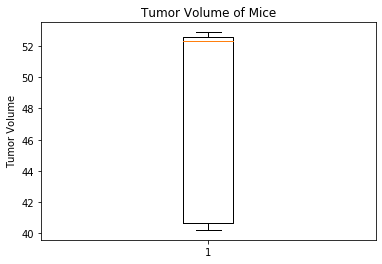

In [134]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_Volume = tumer_means['Tumer Mean']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

## Line and Scatter Plots

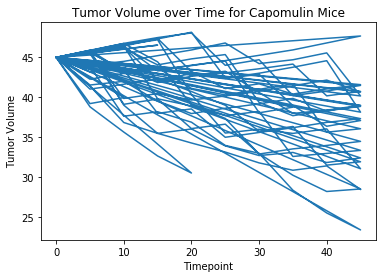

In [140]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = clean_merge_data.loc[(clean_merge_data["Drug Regimen"] == "Capomulin"),:] 
#Capomulin_df
timepoint = Capomulin_df["Timepoint"]
#timepoint
Capomulin_vol = Capomulin_df["Tumor Volume (mm3)"]
#Capomulin_vol
Capomulin_volume_line, = plt.plot(timepoint, Capomulin_vol)

#labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.show()

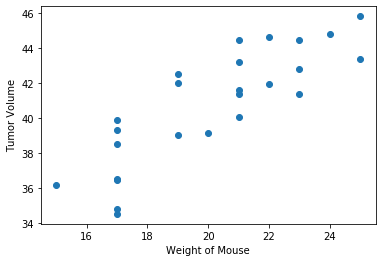

In [142]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# assign for x and y values
mouse_wgt = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_vol = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(mouse_wgt,tumor_vol)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()


## Correlation and Regression

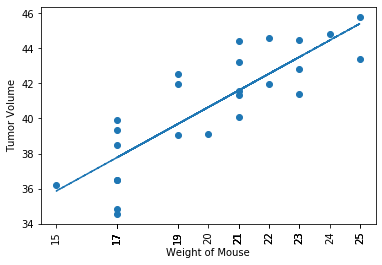

Correlation between weight and tumor volume is 0.84


In [144]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Pull values for x and y values
mouse_wgt = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_vol = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = st.linregress(mouse_wgt, tumor_vol)
      
# Create equation of line to calculate predicted violent crime rate
fit = slope * mouse_wgt + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_wgt,tumor_vol)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_wgt,fit,"--")
plt.xticks(mouse_wgt, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_wgt,tumor_vol)[0],2)
print(f'Correlation between weight and tumor volume is {corr}')